# Experiment No.10
# smita shinde 
# UID = 20BCS4643
# class = BIT_B

Exercise 19 April 

```
# Regression model of multiple variable

``` 



In [1]:
#importing essential libraries 
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
#reading the data of csv file
df = pd.read_csv('hiring.csv')
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
#renaming the column test_score(out of 10) as test_score 
df.rename(columns = {'test_score(out of 10)':'test_score'}, inplace = True)


In [4]:

# Checking the missing values
df.isnull().sum()

experience                    2
test_score                    1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In the above cell  you can see some NAN values in the test score column to remove them. We will calculate the median of the test_score column and change the NAN values to the median value of test_score column.

In [5]:
#here calculating the median of test_score
df.test_score.median()

8.0

In [6]:
#filling the NAN values 
df.test_score = df.test_score.fillna(df.test_score.median())
df

,experience,test_score,interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [7]:
# Checking the missing values
df.isnull().sum()

experience                    2
test_score                    0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

Now in experience column content some NaN values but given data in column is it in string datatype so we have to replace into integer datatype

In [8]:
#replacing the experience column values 
df.replace({'experience':{'five':5,'two':2,'seven':7,'three':3,'ten':10,'eleven':11}},inplace=True)
df

,experience,test_score,interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [9]:
# Checking the missing values
df.isnull().sum()

experience                    2
test_score                    0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [10]:
#calculating the median of experience column 
df.experience.median()

6.0

In [11]:
#filling the NaN values of experience column by medain value of it.
df.experience = df.experience.fillna(df.experience.median())
df.head()

,experience,test_score,interview_score(out of 10),salary($)
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000


In [12]:
# Checking the missing values
df.isnull().sum()

experience                    0
test_score                    0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [13]:
# Renaming the salary($) column to salary
df.rename(columns = {'salary($)':'salary'}, inplace = True)

df

,experience,test_score,interview_score(out of 10),salary
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


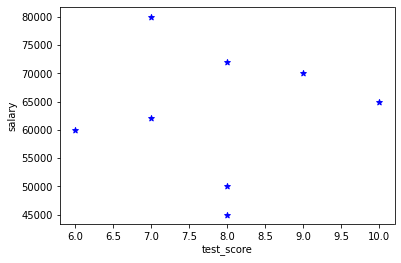

In [14]:
%matplotlib inline
plt.xlabel('test_score')
plt.ylabel('salary')
plt.scatter(df.test_score,df.salary,color ='blue', marker ='*')

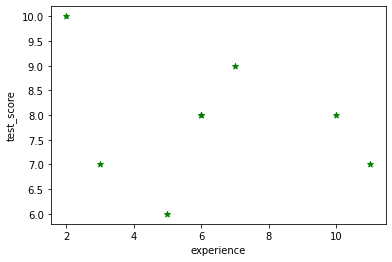

In [15]:
%matplotlib inline
plt.xlabel('experience')
plt.ylabel('test_score')
plt.scatter(df.experience,df.test_score,color ='green', marker ='*')

In [16]:
reg =linear_model.LinearRegression()
#fitting the value of salary to find the regression 
reg.fit(df.drop('salary', axis = 'columns'), df.salary)

LinearRegression()

In [17]:
#finding and printing the value of coefficient of regression 
reg.coef_

array([2813.00813008, 1333.33333333, 2926.82926829])

In [18]:
#finding and printing the value of coefficient of regression 
reg.intercept_

11869.918699186957

In [19]:
#predicting the salary of person who has of 2 yr experienced, 9 test_score and 6 interview_socre
reg.predict([[2,9,6]])

C:\Users\smita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47056.91056911])

In [20]:
#predicting the salary of person who has of 12 yr experienced, 10 test_score and 10 interview_socre
reg.predict([[12,10,10]])

C:\Users\smita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88227.64227642])

In [21]:
#manually checking the predicted value is accurate or not making use of  Y = MX + B formula
2813.00813008* 2 + 1333.33333333 * 9 + 2926.82926829 * 6 + 11869.918699186957

47056.91056905696